In [4]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf


In [5]:
from tensorflow import keras
from keras import layers
from keras.models import Sequential

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)


In [7]:
data_dir

'./datasets/flower_photos'

In [8]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir


PosixPath('datasets/flower_photos')

In [9]:
list(data_dir.glob('*/*.jpg'))

[PosixPath('datasets/flower_photos/tulips/13542672763_20c3cb9272.jpg'),
 PosixPath('datasets/flower_photos/tulips/14087439392_969444f56e.jpg'),
 PosixPath('datasets/flower_photos/tulips/5012813078_99fb977616_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/5811004432_266f0f0c6f.jpg'),
 PosixPath('datasets/flower_photos/tulips/7481215720_73e40f178f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/3446285408_4be9c0fded_m.jpg'),
 PosixPath('datasets/flower_photos/tulips/16751015081_af2ef77c9a_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/134143359_71fa8dd9a4.jpg'),
 PosixPath('datasets/flower_photos/tulips/16951623209_00fb7ec1b1_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/15029962436_3e50c1f30f_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/497305666_b5d4348826_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/7179796338_05e8b1c87b.jpg'),
 PosixPath('datasets/flower_photos/tulips/13997641965_80d5dab542_n.jpg'),
 PosixPath('datasets/flower_photos/tulips/4679869990_7c5f

In [10]:
img_count=len(list(data_dir.glob('*/*.jpg')))
print(img_count)

3670


In [11]:
roses=list(data_dir.glob('*roses/*.jpg'))
roses

[PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8692051081_dffa8709e7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg'),
 PosixPath('datasets/flower_photos/roses/873660804_37f5c6a46e_n.jpg'),
 PosixPath('datasets/flower_photos/roses/2501297526_cbd66a3f7e_m.jpg'),
 PosixPath('datasets/flower_photos/roses/2197754124_5c8a146761_n.jpg'),
 PosixPath('datasets/flower_photos/roses/4325834819_ab56661dcc_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8209458141_38f38be65c_m.jpg'),
 PosixPath('datasets/flower_photos/roses/6732261031_861a1026fa_n.jpg'),
 PosixPath('datasets/flower_photos/roses/1949195327_75f76c12b1.jpg'),
 PosixPath('datasets/flower_photos/roses/3873271620_1d9d314f01_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6653567281_768a1fd160.jpg'),


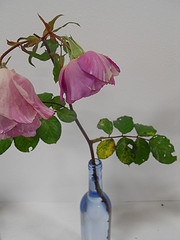

In [12]:
PIL.Image.open(str(roses[1]))

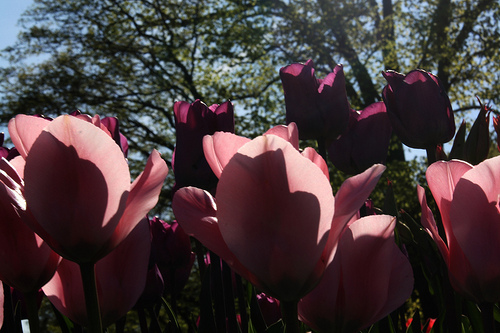

In [13]:
tulips=list(data_dir.glob('tulips/*'))
PIL.Image.open(str(tulips[1]))

In [14]:
flowers_images_dict={
    'roses':list(data_dir.glob('roses/*')),
    'daisy':list(data_dir.glob('daisy/*')),
    'dandelion':list(data_dir.glob('dandelion/*')),
    'sunflowers':list(data_dir.glob('sunflowers/*')),
    'tulips':list(data_dir.glob('tulips/*'))
}

In [15]:
flowers_labels_dict={
    'roses':0,
    'daisy':1,
    'dandelion':2,
    'sunflowers':3,
    'tulips':4,

}

In [16]:
flowers_images_dict['roses'][:5]

[PosixPath('datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'),
 PosixPath('datasets/flower_photos/roses/6309548569_932fee8313_m.jpg'),
 PosixPath('datasets/flower_photos/roses/8692051081_dffa8709e7_m.jpg'),
 PosixPath('datasets/flower_photos/roses/5863698305_04a4277401_n.jpg'),
 PosixPath('datasets/flower_photos/roses/537207677_f96a0507bb.jpg')]

In [17]:
str(flowers_images_dict['roses'][0])

'datasets/flower_photos/roses/3705716290_cb7d803130_n.jpg'

In [18]:
img=cv2.imread(str(flowers_images_dict['roses'][0]))

In [19]:
img.shape

(254, 320, 3)

In [20]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [21]:
X,y=[],[]
for flower_name,images in flowers_images_dict.items():
  for image in images:
    img=cv2.imread(str(image))
    resized_img=cv2.resize(img,(180,180))
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [22]:
X=np.array(X)
y=np.array(y)

In [28]:
y_train

array([1, 3, 2, ..., 1, 4, 4])

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [27]:
X_train_scaled=X_train/255
X_test_scaled=X_test/255

Build convolutional neural network and train it



In [29]:
num_classes=5

In [40]:
from keras.layers.convolutional.conv2d_transpose import Conv2D
model=Sequential([
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(num_classes)
])

In [41]:
model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [42]:
model.fit(X_train_scaled,y_train,epochs=30)

Epoch 1/30
86/86 [==============================] - 103s 1s/step - loss: 1.5183 - accuracy: 0.3456
Epoch 2/30
86/86 [==============================] - 97s 1s/step - loss: 1.0853 - accuracy: 0.5560
Epoch 3/30
86/86 [==============================] - 97s 1s/step - loss: 0.8924 - accuracy: 0.6599
Epoch 4/30
86/86 [==============================] - 100s 1s/step - loss: 0.7501 - accuracy: 0.7122
Epoch 5/30
86/86 [==============================] - 98s 1s/step - loss: 0.5653 - accuracy: 0.7885
Epoch 6/30
86/86 [==============================] - 98s 1s/step - loss: 0.3838 - accuracy: 0.8746
Epoch 7/30
86/86 [==============================] - 98s 1s/step - loss: 0.2168 - accuracy: 0.9291
Epoch 8/30
86/86 [==============================] - 97s 1s/step - loss: 0.1536 - accuracy: 0.9517
Epoch 9/30
86/86 [==============================] - 97s 1s/step - loss: 0.1249 - accuracy: 0.9633
Epoch 10/30
86/86 [==============================] - 98s 1s/step - loss: 0.0483 - accuracy: 0.9895
Epoch 11/30
86/86

In [43]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 11s 371ms/step - loss: 2.6221 - accuracy: 0.6340


[2.6221227645874023, 0.6339869499206543]

In [ ]:
predictions=model.predict(X_test_scaled)
predictions

In [ ]:
score=tf.nn.softmax(predictions[0])

In [ ]:
np.argmax(score)

In [ ]:
y_test[0]

In [30]:
img_height=180
img_width=180

Improve Test Accuracy Using Data Augmentation


In [35]:
data_augmentation=keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip("horizontal",input_shape=(img_height,
                                                                           img_width,3)),
        keras.layers.experimental.preprocessing.RandomRotation(0.1),
        keras.layers.experimental.preprocessing.RandomZoom(0.1),


])

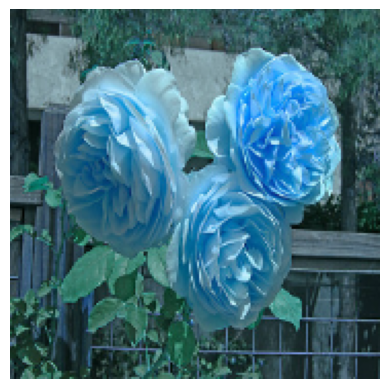

In [32]:
plt.axis('off')
plt.imshow(X[0])

(0.0, 1.0, 0.0, 1.0)

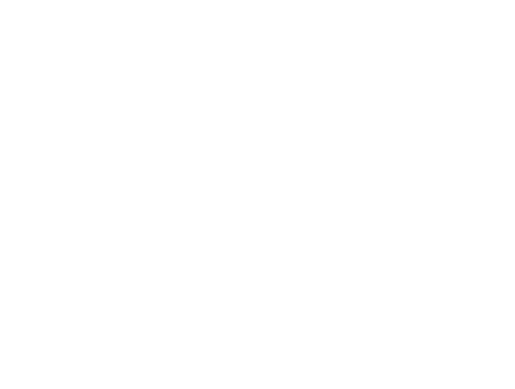

In [33]:
plt.axis('off')

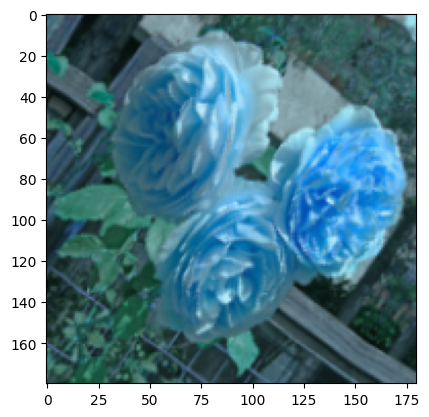

In [36]:
plt.imshow(data_augmentation(X)[0].numpy().astype('uint8'))

Train the model using data augmentation and a drop out layer


In [37]:
num_classes = 5
model=Sequential([
    data_augmentation,
  layers.Conv2D(16,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64,3,padding='same',activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128,activation='relu'),
  layers.Dense(num_classes)
])


In [38]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)


Epoch 1/30
86/86 [==============================] - 117s 1s/step - loss: 1.3432 - accuracy: 0.4273
Epoch 2/30
86/86 [==============================] - 114s 1s/step - loss: 1.0574 - accuracy: 0.5759
Epoch 3/30
86/86 [==============================] - 113s 1s/step - loss: 0.9345 - accuracy: 0.6366
Epoch 4/30
86/86 [==============================] - 123s 1s/step - loss: 0.8714 - accuracy: 0.6588
Epoch 5/30
86/86 [==============================] - 114s 1s/step - loss: 0.8127 - accuracy: 0.6879
Epoch 6/30
86/86 [==============================] - 115s 1s/step - loss: 0.7576 - accuracy: 0.7093
Epoch 7/30
86/86 [==============================] - 115s 1s/step - loss: 0.7522 - accuracy: 0.7148
Epoch 8/30
86/86 [==============================] - 114s 1s/step - loss: 0.7022 - accuracy: 0.7304
Epoch 9/30
86/86 [==============================] - 119s 1s/step - loss: 0.6859 - accuracy: 0.7336
Epoch 10/30
86/86 [==============================] - 113s 1s/step - loss: 0.6405 - accuracy: 0.7533
Epoch 11/

In [39]:
model.evaluate(X_test_scaled,y_test)


29/29 [==============================] - 11s 371ms/step - loss: 0.8826 - accuracy: 0.7331


[0.8826398849487305, 0.7331154942512512]